# 📊**Overview of dataset**
This project utilizes the "Melbourne Housing Snapshot" dataset from Kaggle, which contains detailed information about properties sold in Melbourne.

- Size: The dataset consists of 13,580 samples (property sales) and 21 features (columns).

- Features: The data is a mix of numerical attributes (like Rooms, Landsize) and categorical attributes (such as Regionname, Type), presenting a realistic analytical challenge.

- Key Characteristics: A notable aspect of this dataset is the presence of missing values and categorical features. This makes it an ideal dataset for practicing essential data preprocessing techniques like imputation and encoding.

# **Install packages**

In [ ]:
!pip install opencv-python
!pip install kagglehub
!pip install matplotlib
!pip install seaborn plotly xgboost numpy pandas scikit-learn lightgbm catboost ipywidgets folium

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable


# **Import necessary library**


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
import os
import kagglehub
import warnings
warnings.filterwarnings('ignore')

from folium.plugins import HeatMap
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.compose import TransformedTargetRegressor
from plotly.subplots import make_subplots

import sys
import os
project_root = os.path.dirname(os.getcwd())

if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added project root to path: {project_root}")

# **Load dataset**

In [24]:
# Download latest version
path = kagglehub.dataset_download("dansbecker/melbourne-housing-snapshot")

# ------------------------------------------------
# Setup dataset path
# ------------------------------------------------

DATASET_DIR = path
file_path = os.path.join(DATASET_DIR, 'melb_data.csv')
print("\nPath to dataset file:", file_path,'\n')

# ------------------------------------------------
# Load CSV
# ------------------------------------------------

data = pd.read_csv(file_path)
print("Data loaded successfully. Shape:", data.shape,'\n')
print(data.head())


Path to dataset file: C:\Users\PC LEGION\.cache\kagglehub\datasets\dansbecker\melbourne-housing-snapshot\versions\5\melb_data.csv 

Data loaded successfully. Shape: (13580, 21) 

       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.

# **EDA (Exploratory Data Analysis)**

## **Data Overview and Quality Check**


--------------------------------------------------------------------------------
  BASIC DESCRIPTIVE STATISTICS
--------------------------------------------------------------------------------


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00






--------------------------------------------------------------------------------
  MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------


,Missing Count,Percent
BuildingArea,6450,47.50
YearBuilt,5375,39.58
CouncilArea,1369,10.08
Car,62,0.46


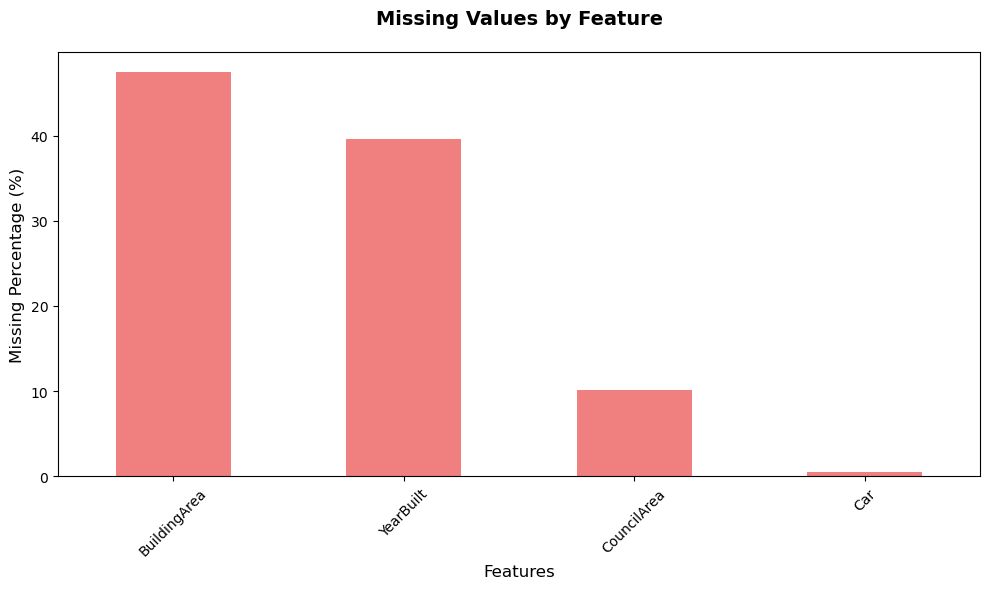





--------------------------------------------------------------------------------
  OUTLIER ANALYSIS FOR NUMERICAL FEATURES
--------------------------------------------------------------------------------


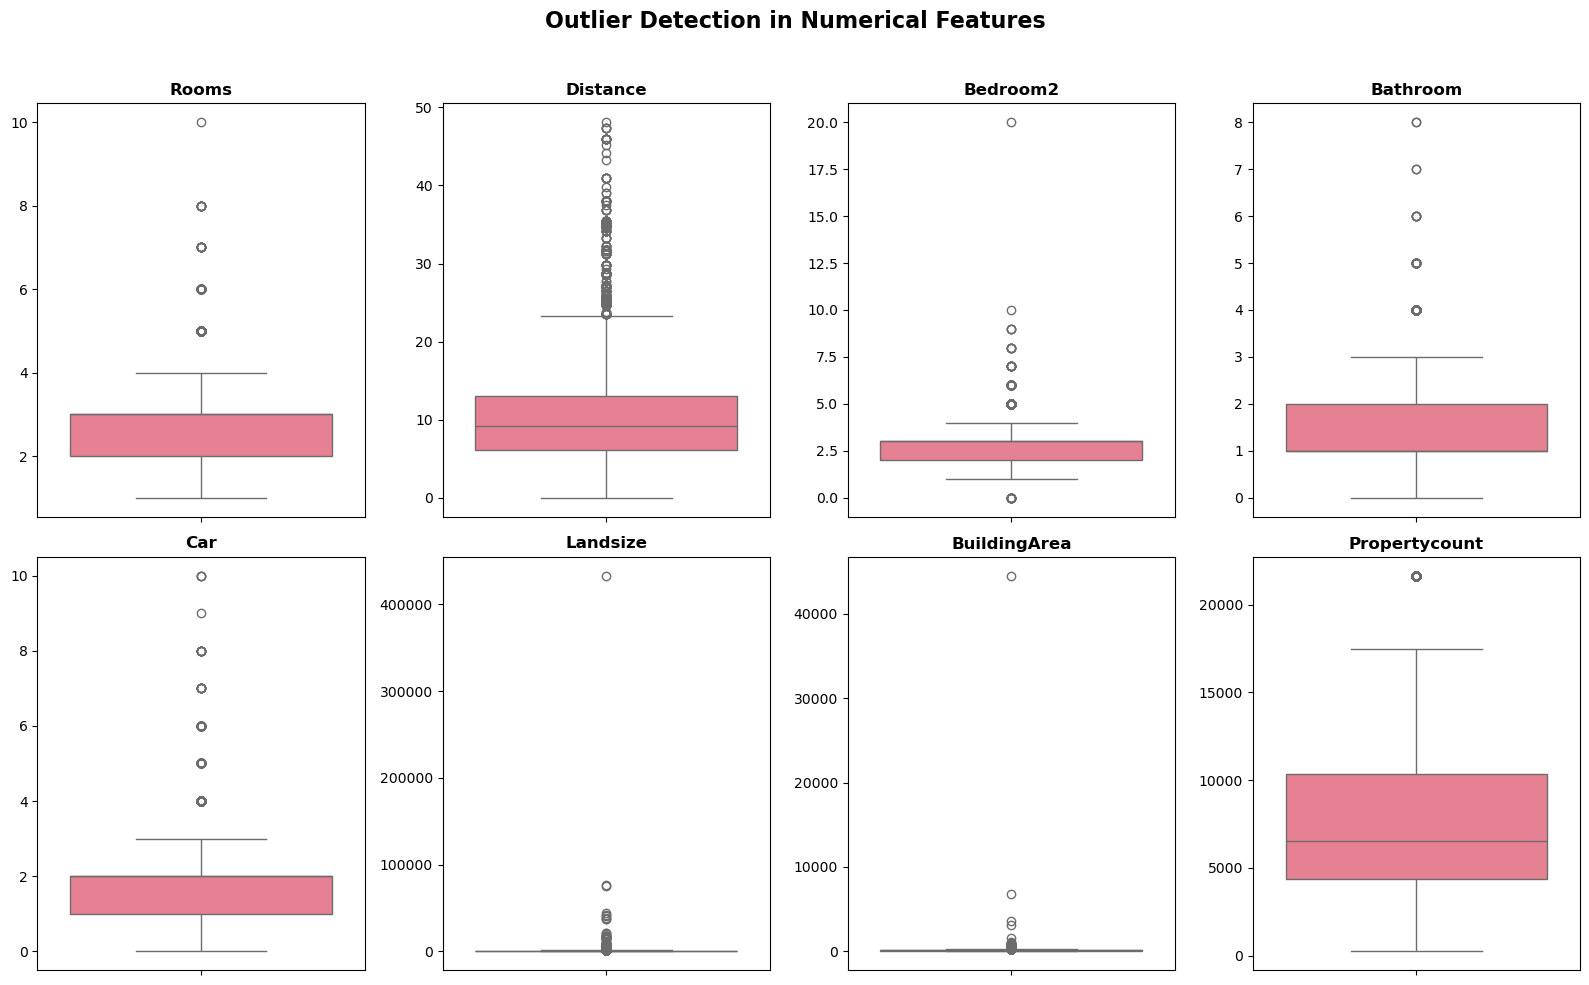

In [25]:
# Set style for consistent plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

from models.IOmanip  import *

# ------------------------------------------------
# BASIC STATISTICS
# ------------------------------------------------

print_section_header("Basic Descriptive Statistics")
display(data.describe().round(2))
add_spacing()

# ------------------------------------------------
# MISSING VALUES ANALYSIS
# ------------------------------------------------

print_section_header("Missing Values Analysis")
missing = pd.DataFrame(data.isnull().sum(), columns=['Missing Count'])
missing['Percent'] = (missing['Missing Count'] / len(data)) * 100
missing_summary = missing[missing['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

if len(missing_summary) > 0:
    display(missing_summary.round(2))
    add_spacing()

    # Visualize missing values
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    missing_summary['Percent'].plot(kind='bar', ax=ax, color='lightcoral')
    ax.set_title('Missing Values by Feature', fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Features', fontsize=12)
    ax.set_ylabel('Missing Percentage (%)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()
    add_spacing()
else:
    print("  No missing values found in the dataset!")
    add_spacing()

# ------------------------------------------------
# OUTLIER
# ------------------------------------------------

print_section_header("Outlier Analysis for Numerical Features")

# Select numerical columns for outlier analysis
numerical_features = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
                      'Landsize', 'BuildingArea', 'Propertycount']

# Create box plots
plt.figure(figsize=(16, 10))
plt.suptitle('Outlier Detection in Numerical Features', fontsize=16, fontweight='bold')

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col, fontsize=12, fontweight='bold')
    plt.ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
add_spacing()


## **Feature Analysis and Correlation**


--------------------------------------------------------------------------------
  PRICE DISTRIBUTION ANALYSIS
--------------------------------------------------------------------------------


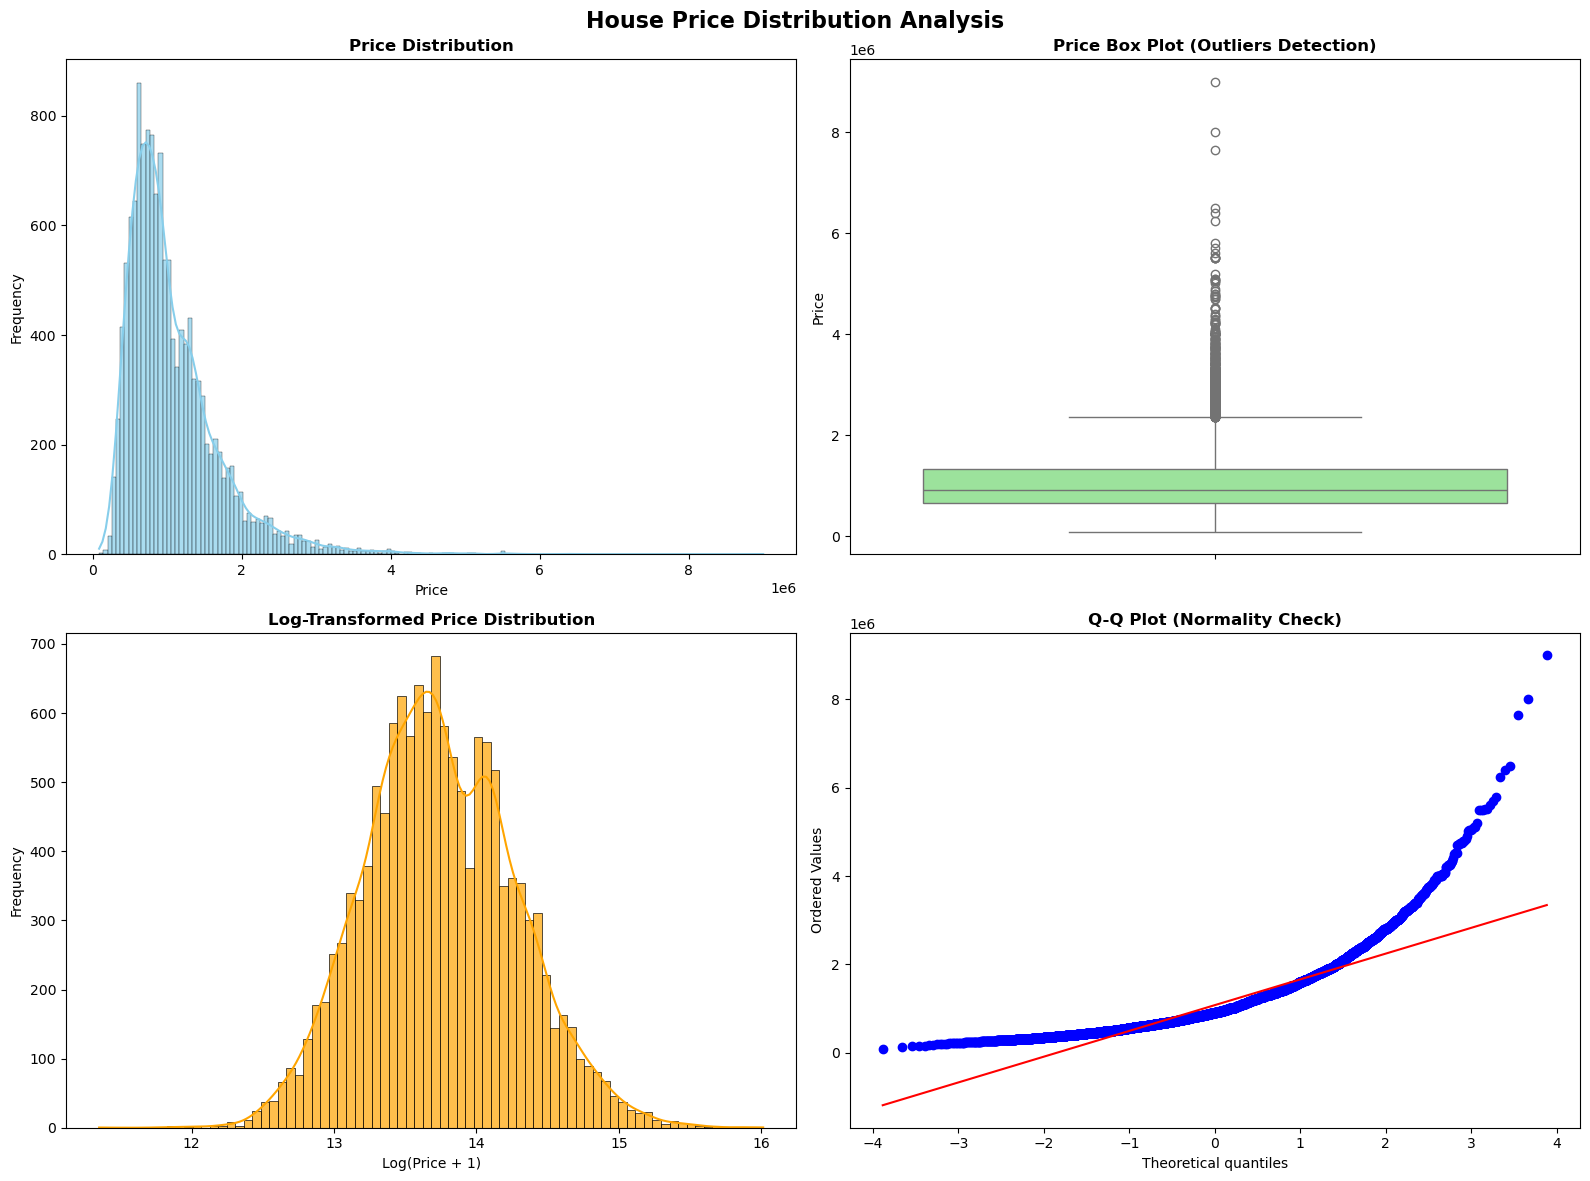

,Statistic,Value
0,Mean,1075684.08
1,Median,903000.00
2,Std Dev,639310.72
3,Min,85000.00
4,Max,9000000.00
5,Skewness,2.24
6,Kurtosis,9.87






--------------------------------------------------------------------------------
  CORRELATION ANALYSIS
--------------------------------------------------------------------------------


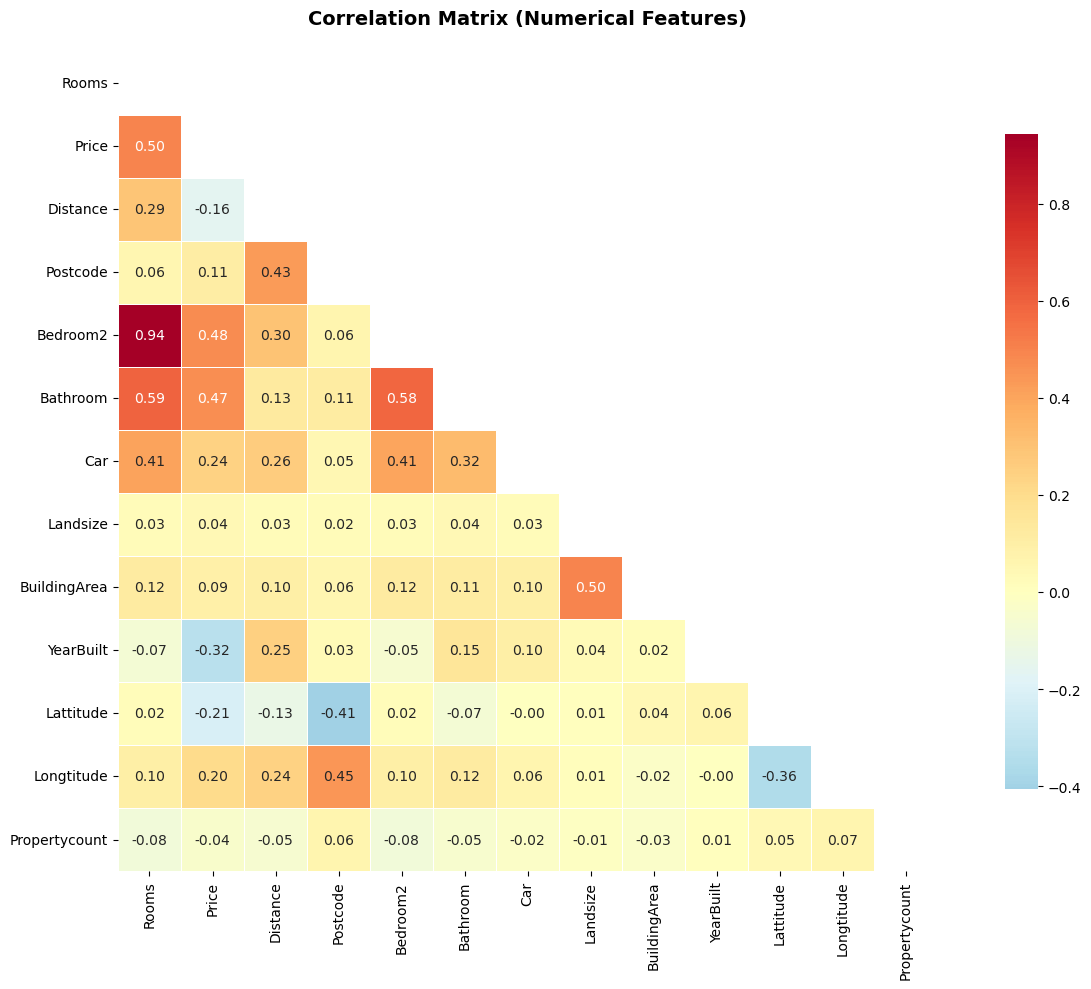




  Features most correlated with Price:


Rooms           0.497
Bedroom2        0.476
Bathroom        0.467
YearBuilt       0.324
Car             0.239
Lattitude       0.213
Longtitude      0.204
Distance        0.163
Postcode        0.108
BuildingArea    0.091
Name: Price, dtype: float64

In [26]:
# ------------------------------------------------
# TARGET VARIABLE ANALYSIS (PRICE DISTRIBUTION)
# ------------------------------------------------

print_section_header("Price Distribution Analysis")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('House Price Distribution Analysis', fontsize=16, fontweight='bold', y=0.98)

# Histogram with KDE
sns.histplot(data['Price'], kde=True, ax=axes[0,0], color='skyblue', alpha=0.7)
axes[0,0].set_title('Price Distribution', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Price')
axes[0,0].set_ylabel('Frequency')

# Box plot
sns.boxplot(y=data['Price'], ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Price Box Plot (Outliers Detection)', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Price')

# Log-transformed distribution
log_prices = np.log1p(data['Price'])
sns.histplot(log_prices, kde=True, ax=axes[1,0], color='orange', alpha=0.7)
axes[1,0].set_title('Log-Transformed Price Distribution', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Log(Price + 1)')
axes[1,0].set_ylabel('Frequency')

# Q-Q plot for normality check
from scipy import stats
stats.probplot(data['Price'], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot (Normality Check)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()
add_spacing()

# Price statistics
price_stats = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Skewness', 'Kurtosis'],
    'Value': [
        data['Price'].mean(),
        data['Price'].median(),
        data['Price'].std(),
        data['Price'].min(),
        data['Price'].max(),
        data['Price'].skew(),
        data['Price'].kurtosis()
    ]
}).round(2)
display(price_stats)
add_spacing()

# ------------------------------------------------
# CORRELATION ANALYSIS
# ------------------------------------------------

print_section_header("Correlation Analysis")

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = data[numerical_cols].corr()

# Create correlation heatmap
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Hide upper triangle
sns.heatmap(corr_matrix,
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            fmt='.2f',
            mask=mask,
            ax=ax,
            cbar_kws={"shrink": 0.8})
ax.set_title('Correlation Matrix (Numerical Features)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
add_spacing()

# Strong correlations with Price
price_corr = corr_matrix['Price'].abs().sort_values(ascending=False)
print("  Features most correlated with Price:")
display(price_corr[price_corr.index != 'Price'].head(10).round(3))
add_spacing()


## **Location-Based Analysis**



--------------------------------------------------------------------------------
  REGIONAL PRICE ANALYSIS
--------------------------------------------------------------------------------


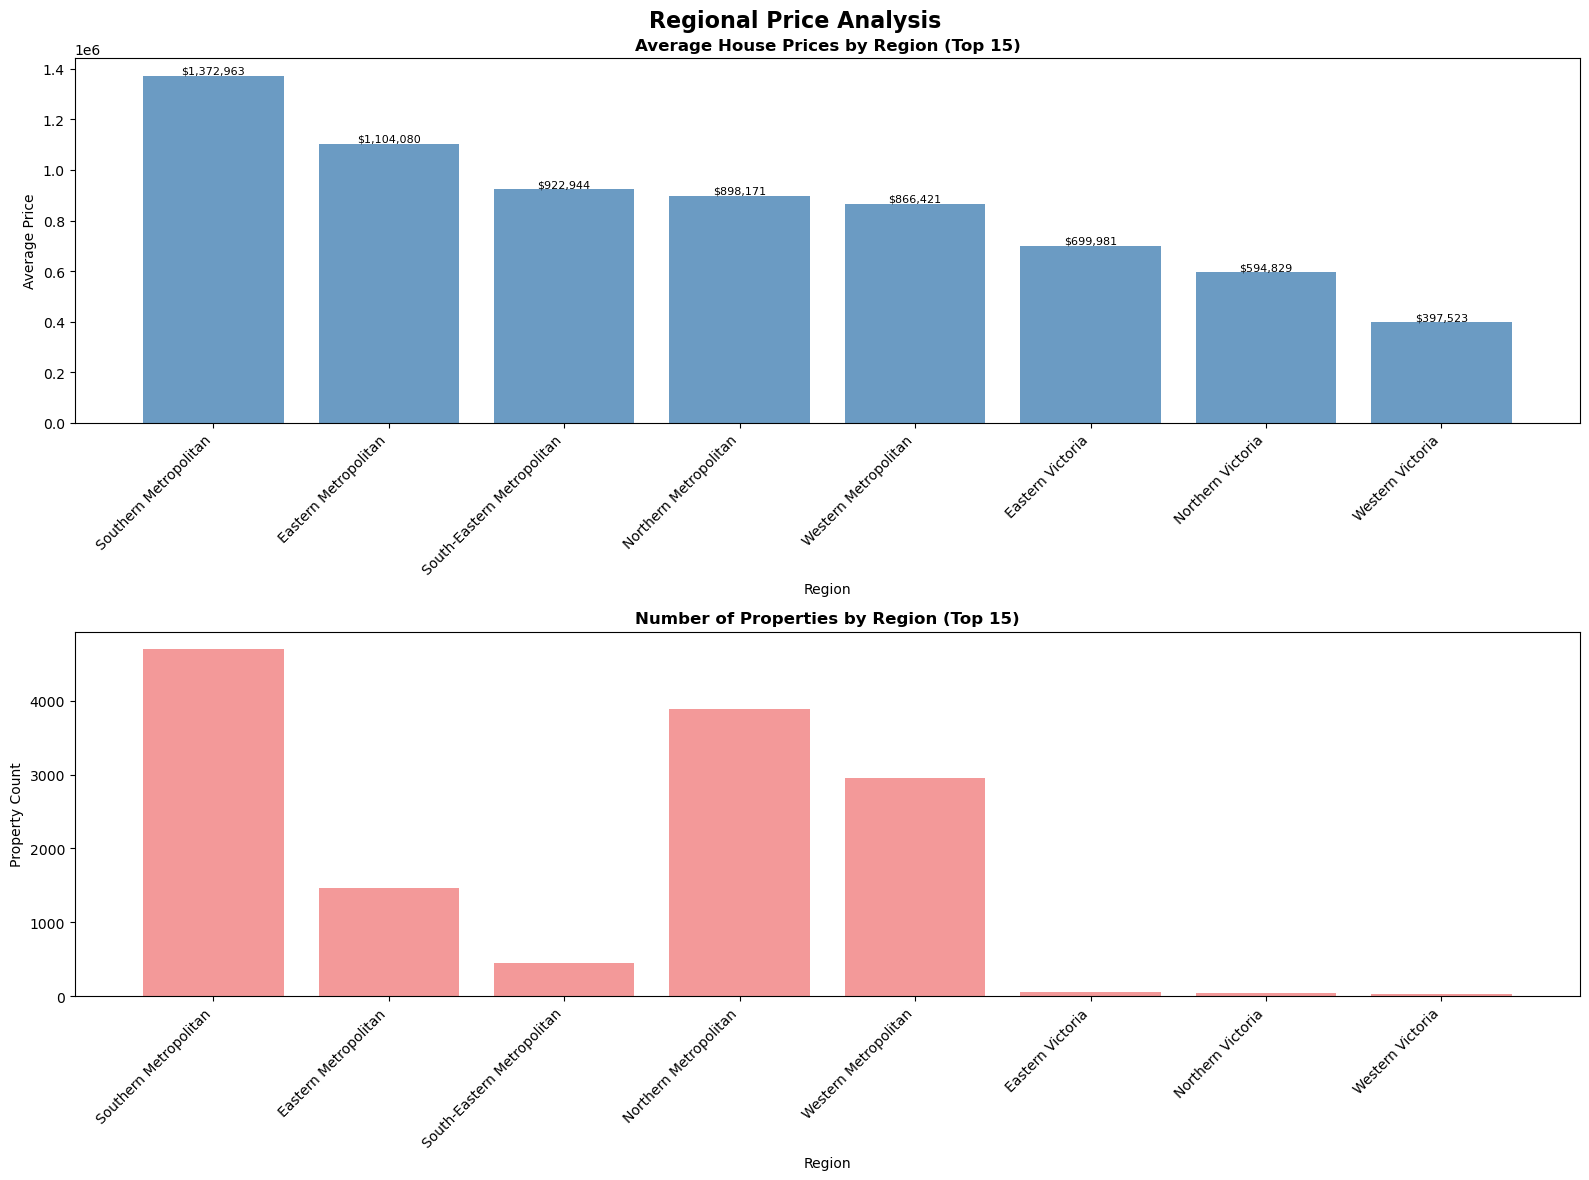




  Regional Statistics Summary:


,Mean_Price,Median_Price,Property_Count,Price_StdDev
Regionname,,,,
Southern Metropolitan,1372963.37,1250000.0,4695,822529.16
Eastern Metropolitan,1104079.63,1010000.0,1471,467417.86
South-Eastern Metropolitan,922943.78,850000.0,450,506525.34
Northern Metropolitan,898171.08,806250.0,3890,443967.69
Western Metropolitan,866420.52,793000.0,2948,394144.70
Eastern Victoria,699980.79,670000.0,53,165498.19
Northern Victoria,594829.27,540000.0,41,217761.67
Western Victoria,397523.44,400000.0,32,86211.96






--------------------------------------------------------------------------------
  DISTANCE VS PRICE ANALYSIS
--------------------------------------------------------------------------------


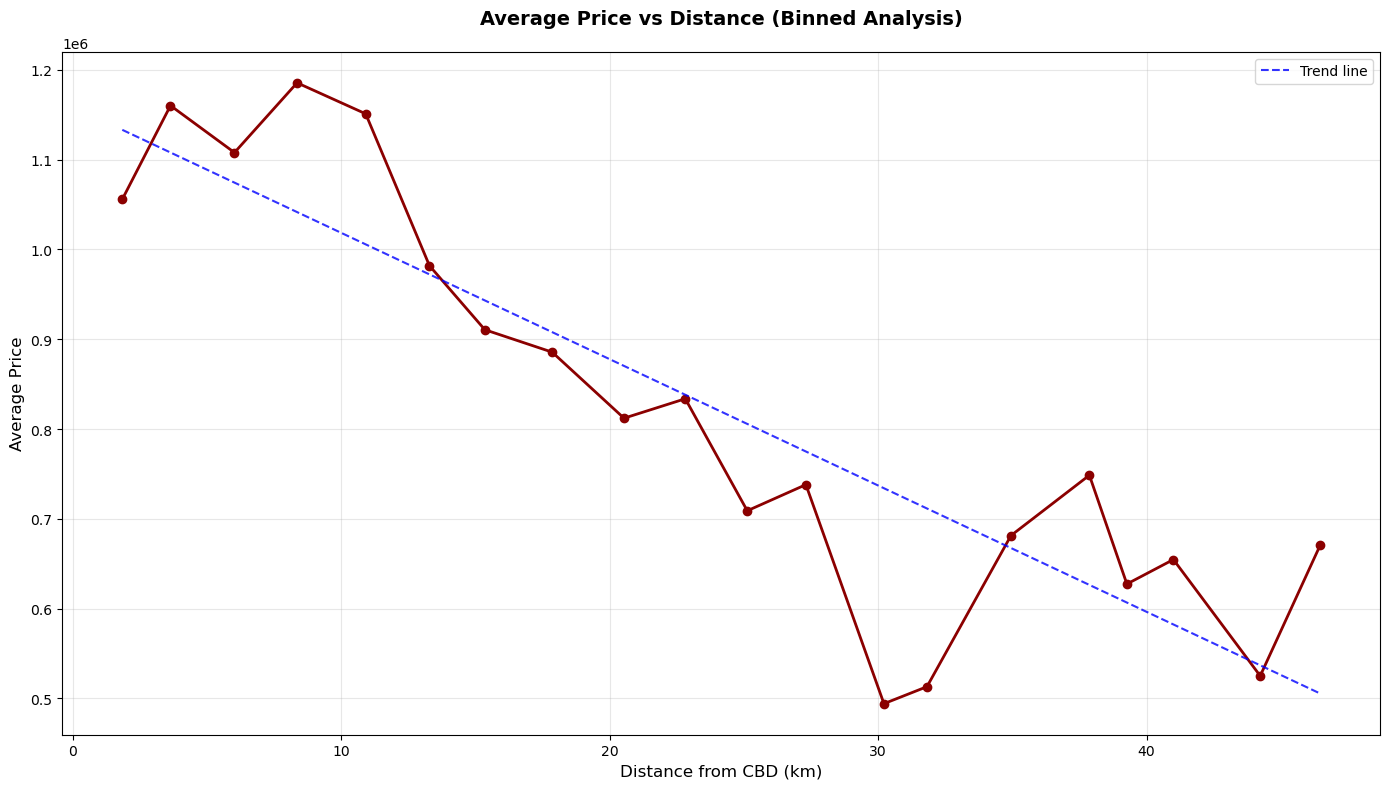





--------------------------------------------------------------------------------
  GEOSPATIAL ANALYSIS
--------------------------------------------------------------------------------
   Interactive Price Heatmap:
   • Red areas indicate higher house prices
   • Blue areas indicate lower house prices
   • Zoom in/out for detailed view


In [27]:
# ------------------------------------------------
# REGIONAL ANALYSIS
# ------------------------------------------------
print_section_header("Regional Price Analysis")

# Calculate regional statistics
region_stats = data.groupby('Regionname').agg({
    'Price': ['mean', 'median', 'count', 'std']
}).round(2)
region_stats.columns = ['Mean_Price', 'Median_Price', 'Property_Count', 'Price_StdDev']
region_stats = region_stats.sort_values('Mean_Price', ascending=False)

# Create subplots for regional analysis
fig, axes = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle('Regional Price Analysis', fontsize=16, fontweight='bold', y=0.98)

# Average price by region
top_regions = region_stats.head(15)  # Top 15 regions
bars1 = axes[0].bar(range(len(top_regions)), top_regions['Mean_Price'],
                    color='steelblue', alpha=0.8)
axes[0].set_title('Average House Prices by Region (Top 15)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Average Price')
axes[0].set_xticks(range(len(top_regions)))
axes[0].set_xticklabels(top_regions.index, rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}', ha='center', va='bottom', fontsize=8)

# Property count by region
bars2 = axes[1].bar(range(len(top_regions)), top_regions['Property_Count'],
                    color='lightcoral', alpha=0.8)
axes[1].set_title('Number of Properties by Region (Top 15)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Property Count')
axes[1].set_xticks(range(len(top_regions)))
axes[1].set_xticklabels(top_regions.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()
add_spacing()

# Display regional statistics table
print("  Regional Statistics Summary:")
display(region_stats.head(10))
add_spacing()

# ------------------------------------------------
# DISTANCE VS PRICE ANALYSIS
# ------------------------------------------------
print_section_header("Distance vs Price Analysis")

# Create interactive scatter plot
fig = make_subplots(rows=2, cols=1,
                    subplot_titles=('Distance vs Price (Interactive)',
                                  'Distance vs Price (Binned Analysis)'),
                    specs=[[{"secondary_y": False}], [{"secondary_y": True}]])

# Interactive scatter plot
scatter_fig = px.scatter(data.sample(n=2000, random_state=42),
                        x='Distance',
                        y='Price',
                        hover_data=['Suburb', 'Regionname'],
                        opacity=0.6,
                        title='Distance from CBD vs House Price')
scatter_fig.update_layout(height=600, showlegend=False)
scatter_fig.show()
add_spacing()

# Binned analysis
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
data['Distance_Bins'] = pd.cut(data['Distance'], bins=20)
binned_analysis = data.groupby('Distance_Bins').agg({
    'Price': 'mean',
    'Distance': 'mean'
}).dropna()

ax.plot(binned_analysis['Distance'], binned_analysis['Price'],
        marker='o', linewidth=2, markersize=6, color='darkred')
ax.set_title('Average Price vs Distance (Binned Analysis)', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Distance from CBD (km)', fontsize=12)
ax.set_ylabel('Average Price', fontsize=12)
ax.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(binned_analysis['Distance'], binned_analysis['Price'], 1)
p = np.poly1d(z)
ax.plot(binned_analysis['Distance'], p(binned_analysis['Distance']),
        "--", alpha=0.8, color='blue', label=f'Trend line')
ax.legend()

plt.tight_layout()
plt.show()
add_spacing()

# ------------------------------------------------
# GEOSPATIAL ANALYSIS
# ------------------------------------------------
print_section_header("Geospatial Analysis")

# Sample data to avoid overload (but ensure good representation)
sample_data = data.sample(n=min(1500, len(data)), random_state=42)

# Create base map centered on Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=10,
               tiles='CartoDB positron',
               width='100%', height='600px')

# Prepare heat data
heat_data = [[row['Lattitude'], row['Longtitude'], row['Price']]
             for index, row in sample_data.iterrows()
             if pd.notnull(row['Lattitude']) and pd.notnull(row['Longtitude'])]

# Add heatmap layer
HeatMap(heat_data,
        radius=12,
        blur=10,
        max_zoom=1,
        gradient={0.2: 'blue', 0.4: 'cyan', 0.6: 'lime', 0.8: 'yellow', 1.0: 'red'}).add_to(m)

# Add title to map
title_html = '''
<h3 align="center" style="font-size:16px; color:black; margin-top:10px;">
<b>Melbourne House Price Heatmap</b><br>
<span style="font-size:12px;">Red = Higher Prices, Blue = Lower Prices</span>
</h3>
'''
m.get_root().html.add_child(folium.Element(title_html))

print("   Interactive Price Heatmap:")
print("   • Red areas indicate higher house prices")
print("   • Blue areas indicate lower house prices")
print("   • Zoom in/out for detailed view")
display(m)
add_spacing()


## **Summary of Key Insights**

In [28]:
# ------------------------------------------------
# SUMMARY INSIGHTS
# ------------------------------------------------
print("\n" + "="*85)
print("KEY INSIGHTS SUMMARY".center(85))
print("="*85)

# Create a styled insights box
insights_content = f"""
DATASET OVERVIEW:
   • Total Properties: {len(data):,}
   • Average Price: ${data['Price'].mean():,.0f}
   • Price Range: ${data['Price'].min():,.0f} - ${data['Price'].max():,.0f}

PRICE CHARACTERISTICS:
   • Distribution: {'Right-skewed' if data['Price'].skew() > 1 else 'Moderately skewed' if data['Price'].skew() > 0.5 else 'Nearly normal'}
   • Standard Deviation: ${data['Price'].std():,.0f}
   • Coefficient of Variation: {(data['Price'].std() / data['Price'].mean() * 100):.1f}%

TOP PERFORMING REGIONS:
   • Most Expensive: {region_stats.index[0]} (${region_stats.iloc[0]['Mean_Price']:,.0f})
   • Highest Volume: {region_stats.loc[region_stats['Property_Count'].idxmax()].name} ({int(region_stats['Property_Count'].max())} properties)
   • Most Stable: {region_stats.loc[region_stats['Price_StdDev'].idxmin()].name} (StdDev: ${region_stats['Price_StdDev'].min():,.0f})

LOCATION INSIGHTS:
   • Distance-Price Correlation: {corr_matrix.loc['Distance', 'Price']:.3f}
   • Price Impact: ${'Strong negative' if corr_matrix.loc['Distance', 'Price'] < -0.3 else 'Moderate negative' if corr_matrix.loc['Distance', 'Price'] < -0.1 else 'Weak'} relationship
   • Geographic Pattern: {'Premium properties concentrated in inner areas' if corr_matrix.loc['Distance', 'Price'] < -0.2 else 'Mixed geographic distribution'}

DATA QUALITY ASSESSMENT:
   • Missing Values: {missing['Missing Count'].sum()} total ({(missing['Missing Count'].sum() / len(data) * 100):.1f}%)
   • Complete Records: {((len(data) - missing['Missing Count'].sum()) / len(data) * 100):.1f}%
   • Data Reliability: {'Excellent' if missing['Missing Count'].sum() / len(data) < 0.05 else 'Good' if missing['Missing Count'].sum() / len(data) < 0.10 else 'Fair'}

KEY RECOMMENDATIONS:
   • Focus analysis on {region_stats.index[0]} for premium segment
   • Consider distance as primary location factor
   • {'Address missing data before modeling' if missing['Missing Count'].sum() > 0 else 'Dataset ready for modeling'}
"""

# Display insights in a prominent box
print_styled_box(insights_content, "MELBOURNE HOUSING MARKET INSIGHTS", "█", 85)

# Additional statistical summary
print("\n" + "="*85)
print("STATISTICAL SUMMARY".center(85))
print("="*85)

summary_stats = pd.DataFrame({
    'Metric': ['Properties Analyzed', 'Average Price', 'Median Price', 'Price Std Dev',
               'Min Price', 'Max Price', 'Regions Covered', 'Distance Range (km)'],
    'Value': [f"{len(data):,}",
              f"${data['Price'].mean():,.0f}",
              f"${data['Price'].median():,.0f}",
              f"${data['Price'].std():,.0f}",
              f"${data['Price'].min():,.0f}",
              f"${data['Price'].max():,.0f}",
              f"{data['Regionname'].nunique()}",
              f"{data['Distance'].min():.1f} - {data['Distance'].max():.1f}"]
})

display(summary_stats)
add_spacing()


                                 KEY INSIGHTS SUMMARY                                


█████████████████████████████████████████████████████████████████████████████████████
█                         MELBOURNE HOUSING MARKET INSIGHTS                         █
█████████████████████████████████████████████████████████████████████████████████████
█ DATASET OVERVIEW:                                                                 █
█    • Total Properties: 13,580                                                     █
█    • Average Price: $1,075,684                                                    █
█    • Price Range: $85,000 - $9,000,000                                            █
█                                                                                   █
█ PRICE CHARACTERISTICS:                                                            █
█    • Distribution: Right-skewed                                                   █
█    • Standard Deviation: $639,311                

,Metric,Value
0,Properties Analyzed,"13,580"
1,Average Price,"$1,075,684"
2,Median Price,"$903,000"
3,Price Std Dev,"$639,311"
4,Min Price,"$85,000"
5,Max Price,"$9,000,000"
6,Regions Covered,8
7,Distance Range (km),0.0 - 48.1


# **Preprocessing**

In [29]:
# ---------------------------------
# Data Preprocessing
# ---------------------------------

# Target: Log transform Price to handle skewness
y = np.log(data['Price'])
X = data.drop('Price', axis=1)

# Columns: Drop unnecessary, identify numeric/categorical
drop_cols = ['Address', 'Date', 'SellerG']
categorical_cols = ['Suburb', 'Type', 'Method', 'CouncilArea', 'Regionname']
numerical_cols = ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
                  'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

X = X.drop(drop_cols, axis=1)

# Flexible preprocessor (imputation + encoding + scaling)
def get_preprocessor(scaler_type='MinMax'):
    if scaler_type == 'MinMax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Impute numerical (missing: BuildingArea, etc.)
        ('scaler', scaler)  # Scaling
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute categorical (missing: CouncilArea)
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Encoding
    ])

    return ColumnTransformer(transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# ---------------------------------
# Split train/test (80/20)
# ---------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (10864, 18), Test shape: (2716, 18)


# **Feature Extraction**

In [30]:
# ---------------------------------
# Feature Extraction (PCA)
# ---------------------------------

# Use best configuration (Standard + 95% - typically good for ML)
print("Feature Extraction with PCA")
best_scaler = 'Standard'
best_pca = 0.95
preprocessor = get_preprocessor(best_scaler)
preprocessor = preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
pca = PCA(n_components=best_pca)
pca = pca.fit(X_train_transformed)

X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)


np.save('../features/train.npy', X_train_pca)
np.save('../features/test.npy', X_test_pca)

print(f"Saved features/train.npy (shape: {X_train_pca.shape}) - Explained variance: {pca.explained_variance_ratio_.sum():.2%}")
print(f"Saved features/test.npy (shape: {X_test_pca.shape}) - Explained variance: {pca.explained_variance_ratio_.sum():.2%}")

Feature Extraction with PCA
Saved features/train.npy (shape: (10864, 46)) - Explained variance: 95.04%
Saved features/test.npy (shape: (2716, 46)) - Explained variance: 95.04%


# **Model training**


In [31]:
# ---------------------------------
# Model training with user input
# ---------------------------------
from IPython.display import display, clear_output
import ipywidgets as widgets

# Định nghĩa models dictionary
models = {
    'LinearRegression': (LinearRegression(), {}),
    'SVR': (SVR(cache_size=2000, tol=1e-2), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'RandomForest': (RandomForestRegressor(random_state=42, n_jobs=-1, max_samples=0.8, max_features='sqrt'),
                    {'n_estimators': [50, 100], 'max_depth': [10, 20]})
}

# Generate Widget
scaler_dropdown = widgets.Dropdown(
    options=['MinMax', 'Standard'],
    value='Standard',
    description='Scaler:',
    disabled=False,
)

pca_dropdown = widgets.Dropdown(
    options=[0.90, 0.95, None],
    value=0.95,
    description='PCA:',
    disabled=False,
)

model_dropdown = widgets.Dropdown(
    options=['LinearRegression', 'SVR', 'RandomForest'],
    value='RandomForest',
    description='Model:',
    disabled=False,
)

run_button = widgets.Button(
    description='Run Model',
    disabled=False,
    button_style='success',
    tooltip='Run with selected configuration'
)

# Make output area
output = widgets.Output()

# Display widget
display(scaler_dropdown)
display(pca_dropdown)
display(model_dropdown)
display(run_button)
display(output)

# Processing when user pressed
def on_run_button_clicked(b):
    # Delete the previous value
    with output:
        clear_output()

        # Retrive value from widget
        scaler_type = scaler_dropdown.value
        pca_var = pca_dropdown.value
        model_name = model_dropdown.value

        print(f"Running with configuration: Scaler={scaler_type}, PCA={pca_var}, Model={model_name}")
        print("Please wait...")

        # Get preprocessor
        preprocessor = get_preprocessor(scaler_type)
        X_train_processed = preprocessor.fit_transform(X_train)
        X_test_processed = preprocessor.transform(X_test)

        # Apply PCA if specified
        if pca_var is not None:
            pca = PCA(n_components=pca_var)
            X_train_processed = pca.fit_transform(X_train_processed)
            X_test_processed = pca.transform(X_test_processed)
            print(f"Applied PCA with {pca_var} variance explained")
        else:
            print("Skipping PCA")

        # Get model and parameters
        model, params = models[model_name]

        # Train model
        grid = GridSearchCV(model, params, cv=3, scoring='r2', n_jobs=-1)
        grid.fit(X_train_processed, y_train)

        # Predict & Evaluate
        y_pred = grid.predict(X_test_processed)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Print result
        print("\n=== RESULTS ===")
        print(f"Best Parameters: {grid.best_params_}")
        print(f"MSE: {mse:.4f}")
        print(f"R2 Score: {r2:.4f}")

run_button.on_click(on_run_button_clicked)







Dropdown(description='Scaler:', index=1, options=('MinMax', 'Standard'), value='Standard')

Dropdown(description='PCA:', index=1, options=(0.9, 0.95, None), value=0.95)

Dropdown(description='Model:', index=2, options=('LinearRegression', 'SVR', 'RandomForest'), value='RandomFore…

Button(button_style='success', description='Run Model', style=ButtonStyle(), tooltip='Run with selected config…

Output()

# **Full model training**


In [32]:
# ---------------------------------
# Full model training code (commented out)
# ---------------------------------

# models = {
#     'LinearRegression': (LinearRegression(), {}),
#     'SVR': (SVR(cache_size=2000, tol=1e-2), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
#     'RandomForest': (RandomForestRegressor(random_state=42,n_jobs= -1, max_samples= 0.8, max_features= 'sqrt'), {'n_estimators': [50, 100], 'max_depth': [10, 20]})
# }

# results = []
# print("Starting training and comparison...")

# # Test configurations (2 scalers x 2 PCA variances x 3 models = 12 configs)
# for scaler_type in ['MinMax', 'Standard']:

#     preprocessor = get_preprocessor(scaler_type)
#     X_train_processed = preprocessor.fit_transform(X_train)
#     X_test_processed = preprocessor.transform(X_test)

#     for pca_var in [0.90, 0.95]:

#         pca = PCA(n_components=pca_var)
#         pca.fit(X_train_processed)
#         X_train_processed= pca.transform(X_train_processed)
#         X_test_processed = pca.transform(X_test_processed)


#         for model_name, (model, params) in models.items():

#             # GridSearchCV (tune params, cv=3)
#             grid = GridSearchCV(model, params, cv=3, scoring='r2', n_jobs=-1)
#             grid.fit(X_train_processed, y_train)

#             # Predict & Evaluate
#             y_pred = grid.predict(X_test_processed)
#             mse = mean_squared_error(y_test, y_pred)
#             r2 = r2_score(y_test, y_pred)

#             results.append({
#                 'Scaler': scaler_type,
#                 'PCA Variance': pca_var,
#                 'Model': model_name,
#                 'Best Params': grid.best_params_,
#                 'MSE': mse,
#                 'R2': r2
#             })

#             print(f"{scaler_type} + PCA-{pca_var} + {model_name}: R2 = {r2:.4f}")


# # results=[{'Scaler': 'MinMax', 'PCA Variance': 0.9, 'Model': 'LinearRegression', 'Best Params': {}, 'MSE': 0.06685503260813426, 'R2': 0.7553918793953551}, {'Scaler': 'MinMax', 'PCA Variance': 0.9, 'Model': 'SVR', 'Best Params': {'C': 1, 'kernel': 'rbf'}, 'MSE': 0.052405729191909355, 'R2': 0.8082587588927561}, {'Scaler': 'MinMax', 'PCA Variance': 0.9, 'Model': 'RandomForest', 'Best Params': {'max_depth': 20, 'n_estimators': 100}, 'MSE': 0.05507704817827605, 'R2': 0.7984849798472702}, {'Scaler': 'MinMax', 'PCA Variance': 0.95, 'Model': 'LinearRegression', 'Best Params': {}, 'MSE': 0.06996952579180163, 'R2': 0.7439966217076015}, {'Scaler': 'MinMax', 'PCA Variance': 0.95, 'Model': 'SVR', 'Best Params': {'C': 1, 'kernel': 'rbf'}, 'MSE': 0.054173311171008376, 'R2': 0.8017915583088251}, {'Scaler': 'MinMax', 'PCA Variance': 0.95, 'Model': 'RandomForest', 'Best Params': {'max_depth': 20, 'n_estimators': 100}, 'MSE': 0.05545315932730506, 'R2': 0.7971088704099794}, {'Scaler': 'Standard', 'PCA Variance': 0.9, 'Model': 'LinearRegression', 'Best Params': {}, 'MSE': 0.08273445872660122, 'R2': 0.6972924899015877}, {'Scaler': 'Standard', 'PCA Variance': 0.9, 'Model': 'SVR', 'Best Params': {'C': 1, 'kernel': 'rbf'}, 'MSE': 0.041343216119517856, 'R2': 0.848734104221849}, {'Scaler': 'Standard', 'PCA Variance': 0.9, 'Model': 'RandomForest', 'Best Params': {'max_depth': 20, 'n_estimators': 100}, 'MSE': 0.05377257088303506, 'R2': 0.803257780444506}, {'Scaler': 'Standard', 'PCA Variance': 0.95, 'Model': 'LinearRegression', 'Best Params': {}, 'MSE': 0.08056798810147461, 'R2': 0.7052191378633584}, {'Scaler': 'Standard', 'PCA Variance': 0.95, 'Model': 'SVR', 'Best Params': {'C': 10, 'kernel': 'rbf'}, 'MSE': 0.04204064650856506, 'R2': 0.8461823571048093}, {'Scaler': 'Standard', 'PCA Variance': 0.95, 'Model': 'RandomForest', 'Best Params': {'max_depth': 20, 'n_estimators': 100}, 'MSE': 0.05450665412608408, 'R2': 0.8005719284533466}]

# # Results comparison table
# print("### Results Comparison Table")
# results_df = pd.DataFrame(results)
# display(results_df.sort_values(by='R2', ascending=False).round(4))

# # Feature Importance (from best RandomForest, without PCA)

# print("### Feature Importance (Top 20 - From RandomForest without PCA)")

# rf_results = results_df[results_df['Model'] == 'RandomForest']

# if not rf_results.empty:
#     best_rf_row = rf_results.loc[rf_results['R2'].idxmax()]
#     best_scaler = best_rf_row['Scaler']

#     # Retrain preprocessor and RF without PCA for feature importance
#     preprocessor = get_preprocessor(best_scaler)
#     X_train_transformed = preprocessor.fit_transform(X_train)

#     # Fit RF without PCA
#     rf_no_pca = RandomForestRegressor(random_state=42, n_jobs=-1, max_samples=0.8, max_features='sqrt', **best_rf_row['Best Params'])
#     rf_no_pca.fit(X_train_transformed, y_train)

#     # Feature names after transformation - FIXED
#     num_features = numerical_cols
#     cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
#     all_features = np.concatenate([num_features, cat_features])

#     # Plot top 20
#     importances = pd.Series(rf_no_pca.feature_importances_, index=all_features).sort_values(ascending=False)[:20]
#     plt.figure(figsize=(12, 8))
#     sns.barplot(x=importances.values, y=importances.index)
#     plt.title('Top 20 Feature Importance (Random Forest)')
#     plt.xlabel('Relative Importance')
#     plt.savefig('feature_importance.png')
#     plt.show()
#     plt.close()
# else:
#     print("No RandomForest results available for analysis")

# **MLP (Multilayer Perceptron)**


In [33]:
print("Deep Learning Model (MLP)")

results=[{'Scaler': 'MinMax', 'PCA Variance': 0.9, 'Model': 'LinearRegression', 'Best Params': {}, 'MSE': 0.06685503260813426, 'R2': 0.7553918793953551}, {'Scaler': 'MinMax', 'PCA Variance': 0.9, 'Model': 'SVR', 'Best Params': {'C': 1, 'kernel': 'rbf'}, 'MSE': 0.052405729191909355, 'R2': 0.8082587588927561}, {'Scaler': 'MinMax', 'PCA Variance': 0.9, 'Model': 'RandomForest', 'Best Params': {'max_depth': 20, 'n_estimators': 100}, 'MSE': 0.05507704817827605, 'R2': 0.7984849798472702}, {'Scaler': 'MinMax', 'PCA Variance': 0.95, 'Model': 'LinearRegression', 'Best Params': {}, 'MSE': 0.06996952579180163, 'R2': 0.7439966217076015}, {'Scaler': 'MinMax', 'PCA Variance': 0.95, 'Model': 'SVR', 'Best Params': {'C': 1, 'kernel': 'rbf'}, 'MSE': 0.054173311171008376, 'R2': 0.8017915583088251}, {'Scaler': 'MinMax', 'PCA Variance': 0.95, 'Model': 'RandomForest', 'Best Params': {'max_depth': 20, 'n_estimators': 100}, 'MSE': 0.05545315932730506, 'R2': 0.7971088704099794}, {'Scaler': 'Standard', 'PCA Variance': 0.9, 'Model': 'LinearRegression', 'Best Params': {}, 'MSE': 0.08273445872660122, 'R2': 0.6972924899015877}, {'Scaler': 'Standard', 'PCA Variance': 0.9, 'Model': 'SVR', 'Best Params': {'C': 1, 'kernel': 'rbf'}, 'MSE': 0.041343216119517856, 'R2': 0.848734104221849}, {'Scaler': 'Standard', 'PCA Variance': 0.9, 'Model': 'RandomForest', 'Best Params': {'max_depth': 20, 'n_estimators': 100}, 'MSE': 0.05377257088303506, 'R2': 0.803257780444506}, {'Scaler': 'Standard', 'PCA Variance': 0.95, 'Model': 'LinearRegression', 'Best Params': {}, 'MSE': 0.08056798810147461, 'R2': 0.7052191378633584}, {'Scaler': 'Standard', 'PCA Variance': 0.95, 'Model': 'SVR', 'Best Params': {'C': 10, 'kernel': 'rbf'}, 'MSE': 0.04204064650856506, 'R2': 0.8461823571048093}, {'Scaler': 'Standard', 'PCA Variance': 0.95, 'Model': 'RandomForest', 'Best Params': {'max_depth': 20, 'n_estimators': 100}, 'MSE': 0.05450665412608408, 'R2': 0.8005719284533466}]
results_df = pd.DataFrame(results)

# --- Define preprocessor (you can switch 'Standard'/'MinMax')
preprocessor = get_preprocessor('Standard')

# --- Define deep MLP
mlp = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64, 32, 16),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=2000,
    random_state=42,
    early_stopping=True
)

# --- Wrap model with target scaling (stabilizes training)
mlp_scaled = TransformedTargetRegressor(
    regressor=mlp,
    transformer=StandardScaler()
)

# --- Full pipeline (drop PCA for MLP, or add if you really want to compare)
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),

    ('model', mlp_scaled)
])

# --- Fit & evaluate
mlp_pipeline.fit(X_train, y_train)
y_pred_mlp = mlp_pipeline.predict(X_test)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MLP (Deep Learning) - MSE: {mse_mlp:.4f}, R2: {r2_mlp:.4f}")

# --- Compare with best traditional model
best_traditional_r2 = results_df['R2'].max()
print(f"Comparison: Deep Learning R2 ({r2_mlp:.4f}) vs Best Traditional ({best_traditional_r2:.4f})")

# --- Add MLP result to results table
mlp_result = {
    'Scaler': 'Standard',
    'PCA Variance': 'None',  # clearer than 0.95 if you skipped PCA
    'Model': 'MLP',
    'Best Params': 'hidden_layer_sizes=(256,128,64,32,16), activation=relu',
    'MSE': mse_mlp,
    'R2': r2_mlp
}

results_df = pd.concat([results_df, pd.DataFrame([mlp_result])], ignore_index=True)
print("\n")
print("Updated Results Comparison Table (Including MLP)")
display(results_df.sort_values(by='R2', ascending=False).round(4))

Deep Learning Model (MLP)
MLP (Deep Learning) - MSE: 0.0399, R2: 0.8539
Comparison: Deep Learning R2 (0.8539) vs Best Traditional (0.8487)


Updated Results Comparison Table (Including MLP)


,Scaler,PCA Variance,Model,Best Params,MSE,R2
12,Standard,None,MLP,"hidden_layer_sizes=(256,128,64,32,16), activat...",0.0399,0.8539
7,Standard,0.9,SVR,"{'C': 1, 'kernel': 'rbf'}",0.0413,0.8487
10,Standard,0.95,SVR,"{'C': 10, 'kernel': 'rbf'}",0.0420,0.8462
1,MinMax,0.9,SVR,"{'C': 1, 'kernel': 'rbf'}",0.0524,0.8083
8,Standard,0.9,RandomForest,"{'max_depth': 20, 'n_estimators': 100}",0.0538,0.8033
4,MinMax,0.95,SVR,"{'C': 1, 'kernel': 'rbf'}",0.0542,0.8018
11,Standard,0.95,RandomForest,"{'max_depth': 20, 'n_estimators': 100}",0.0545,0.8006
2,MinMax,0.9,RandomForest,"{'max_depth': 20, 'n_estimators': 100}",0.0551,0.7985
5,MinMax,0.95,RandomForest,"{'max_depth': 20, 'n_estimators': 100}",0.0555,0.7971
0,MinMax,0.9,LinearRegression,{},0.0669,0.7554


# **Project Conclusion**

This project successfully developed and evaluated several machine learning models to predict housing prices in Melbourne, navigating real-world data challenges such as a **skewed price distribution** and **significant rates of missing data**.

---

## Model Performance Comparison

The systematic comparison of models yielded insightful results into the performance of each algorithm:

* **Linear Regression** served as a baseline, achieving a modest R² score of approximately **0.75**. As expected, this simple linear model was insufficient to capture the complex, non-linear dynamics of the real estate market.

* **Random Forest** provided a significant improvement (R² ≈ **0.80**), showcasing its ability to model non-linear relationships and complex interactions between features.

* **Support Vector Regressor (SVR)** emerged as the most effective **traditional machine learning model**, with a final R² score of approximately **0.849**. Its success was highly dependent on proper preprocessing, specifically the use of `StandardScaler`.

* Finally, the **MLP (Deep Learning)** model achieved the **best overall performance**, reaching an R² score of **0.854**. Its multi-layered architecture was capable of automatically learning intricate features, ultimately outperforming the finely-tuned SVR model.

---

###  Key Findings

The feature importance analysis provided critical insights into the primary drivers of property value. The most influential factors were determined to be the **property type** (e.g., house vs. unit), its **physical size** (such as the number of rooms and land size), and its **geographic location**.

---

### Future Work

While the current model demonstrates high accuracy, several avenues exist for future improvement:
* Fine-tuning the MLP architecture and hyperparameters for further optimization.
* Experimenting with other advanced algorithms such as XGBoost or LightGBM.
* Conducting more extensive feature engineering to create new, informative variables.
* Incorporating external datasets, such as crime rates or school district quality, to provide richer context.

---

In conclusion, this project not only produced a reliable model but also provided a valuable comparison between traditional machine learning and deep learning approaches, demonstrating the distinct strengths of both methodologies.



